In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/rkmishracs/dataset/main/advertising.csv")

In [3]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
df.shape

(200, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


<AxesSubplot:xlabel='TV', ylabel='Sales'>

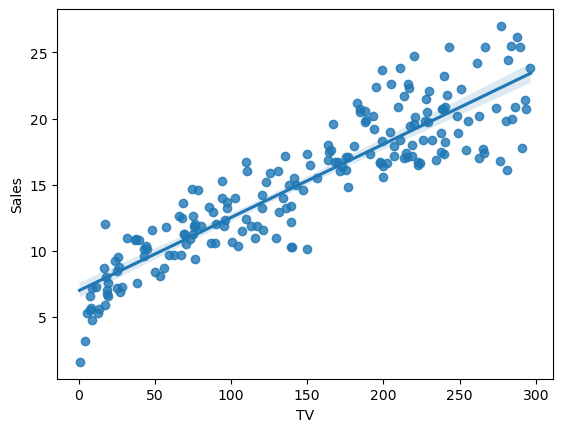

In [7]:
#TV vs Sales
sns.regplot(data=df,x='TV',y='Sales')

<AxesSubplot:xlabel='Radio', ylabel='Sales'>

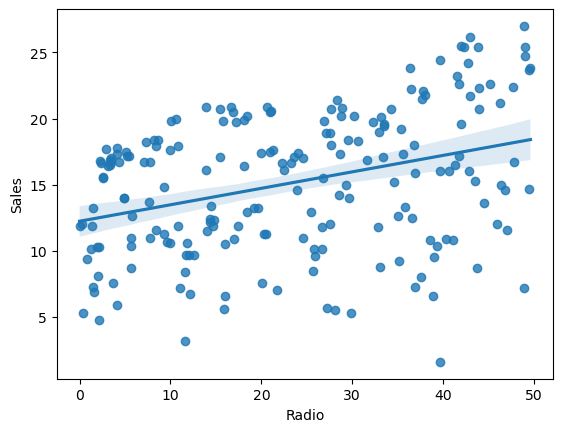

In [8]:
#Radio vs Sales
sns.regplot(data=df,x='Radio',y='Sales')

<AxesSubplot:xlabel='Newspaper', ylabel='Sales'>

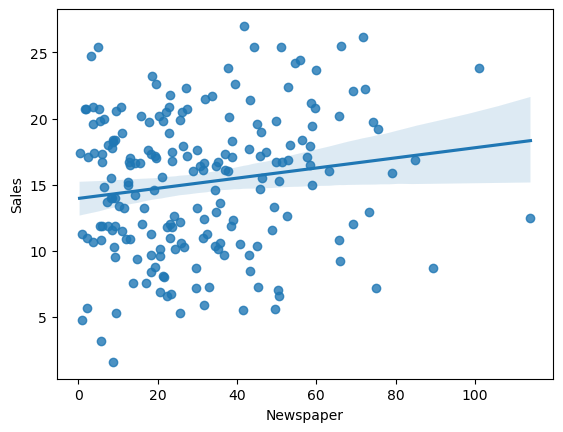

In [10]:
#Newspaper vs Sales
sns.regplot(data=df,x='Newspaper',y='Sales')

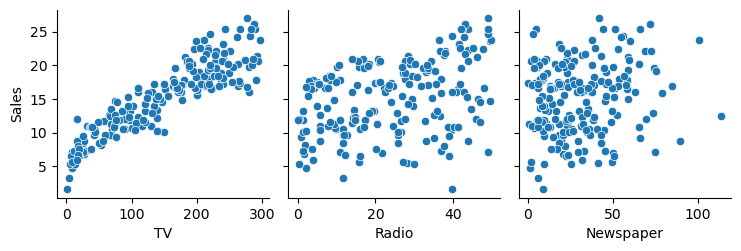

In [11]:
sns.pairplot(data=df,x_vars=['TV','Radio','Newspaper'],y_vars='Sales',kind='scatter')

In [12]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


<AxesSubplot:>

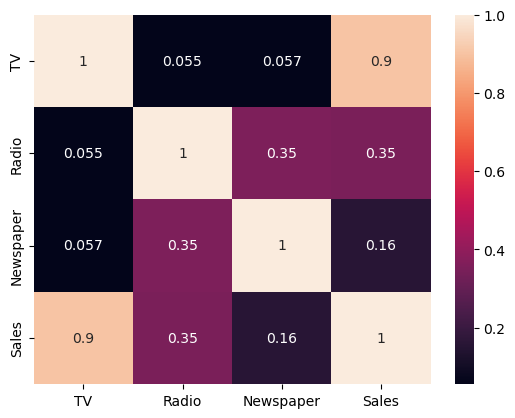

In [14]:
#annot= True makes the heatmap come with values
sns.heatmap(df.corr(),annot=True)

### Inference

The independent variable is highly correlated to the feature 'TV'. So it is only logical to fit the model based upon this particular feature.

**Simple linear regression with one variable

In [24]:
X = np.array(df['TV'])
Y = np.array(df['Sales'])
X = X.reshape(-1,1)
Y = Y.reshape(-1,1)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=100)


## Model creation and training

In [29]:

model = LinearRegression()

In [31]:
model.fit(X_train,y_train)
model.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [34]:
y_pred = model.predict(X_test)

In [47]:
#Model weights and bias(none in this case)
coeff = model.coef_
bias = model.intercept_
print(coeff,bias)

[[0.05410548]] [6.99553291]


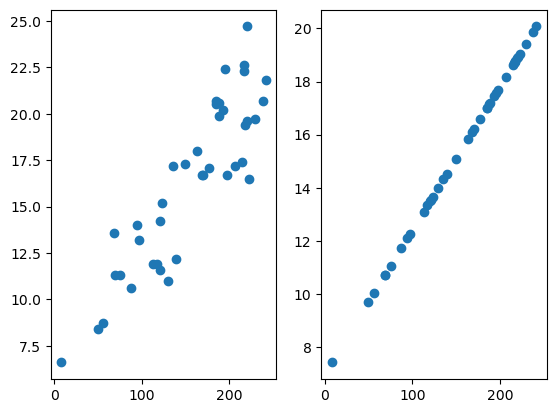

In [41]:
fig,ax = plt.subplots(1,2)
ax[0].scatter(X_test,y_test)
ax[1].scatter(X_test,y_pred)

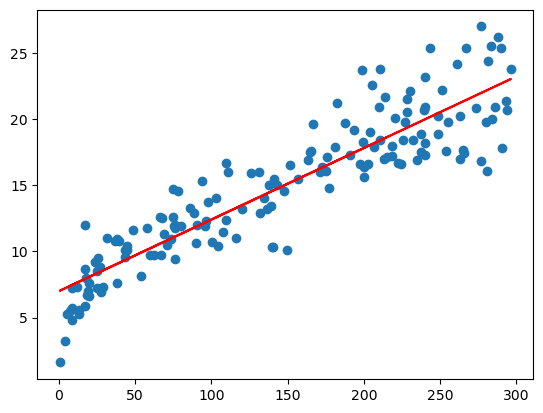

In [53]:
plt.scatter(X_train,y_train)
plt.plot(X_train,coeff*X_train+bias,'r')
plt.show()

## Calculating residuals
error = f(y_pred, y_train)

In [60]:
y_train_pred = model.predict(X_train)

<Figure size 640x480 with 0 Axes>

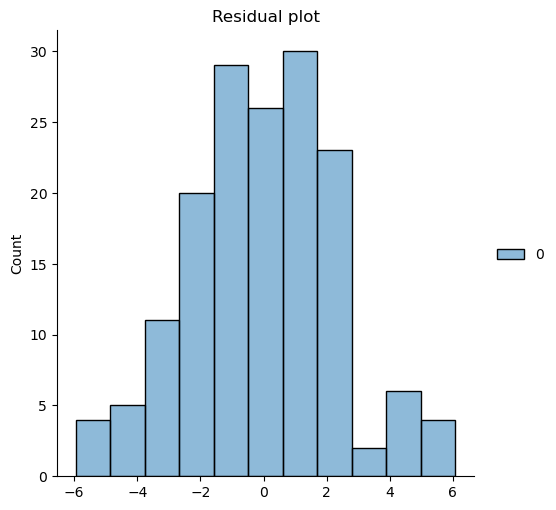

In [64]:
residual = y_train_pred - y_train
plt.figure()
sns.displot(residual)
plt.title("Residual plot")
plt.show()

/Users/prithvishah/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

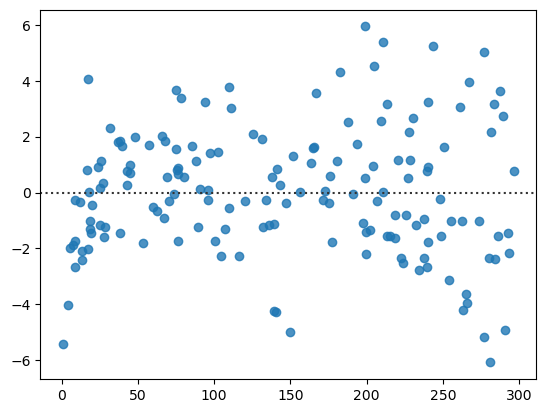

In [69]:
sns.residplot(X_train,y_train)